# Importing the Modules

Here we are importing the modules necessary for text cleaning, data visualization, 
for word-embedding, deep learning and Machine learning.

In [2]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import nltk
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


## Importing text file cleanning purpose

I have created the text file of reviews that are extracted from amazon for product OnePlus Nord 2.

Now i am importing that text file 

> **🛠🗡Note-** The newlines are already removed from extraction (webscrapping file:- web_scrapping_text_file_writing.py is used). The newlines or lines with small content are removed from text file using ***lines = [line for line in t if len(line)>10]***

In [3]:
def read_text_file(path):
    '''
    Provide the path of text file and it will return it in form of list 
    '''
    with open(path, 'r', encoding= 'utf-8') as file:
        list_of_string = file.readlines()
        return list_of_string

In [4]:
list_of_reviews = read_text_file('reviews_cleaned_oneplus.txt')

In [5]:
len(list_of_reviews)

5186

In [6]:
list_of_reviews[187:201]

['  \xa0After update the device is not going to Start and instantly I reported it to Amazon and request a return. But till now it’s about 15 days gone but they are not going to pick up.#DepressedNo one is listening to my problem.\n',
 "  This phone has a very good balance of all the features.1. Camera : Camera is good with nice colour reproduction. Photos come out clean and it's dependable in low light conditions as well.2. Battery : Battery backup is decent, not the best of all but it's good enough for an average person. A fast charging is always good to have and it charges in 20 minutes from 20 percent to 80 percent which is the average charging circle for me.3. Screen : 90 Hz screen is actually more than enough for an average user like me. Backed up with good haptics, it makes the experience good.4. Connectivity : 5G is certainly something which we will see later but for now it supports Career aggregation. Call quality is not right there as my iPhone but much better than average and

# Text Cleanning

There are some problems in this file which are given below:

1. Emoji.
2. newlines.
3. spaces in front and back of strings and also in middle of strings
4. Some # (HashTags).
5. String/text in wrong way like no space between next digit and punctuation (y.1), 
no space (have punctuation betn) between strings two word (hello.Morning )

> **🗡🛠Note:-** I am not removing any puctuations. first i am cleanning file then i will save it for future use and last
i will remove all puctuations.

In [7]:
list_for_experiment = list_of_reviews[125:130]
list_for_experiment

['                    The media could not be loaded.\n',
 '                \n',
 '  \xa0One Plus Nord 2 5G की Quality खराब है और amazon की सेवाएं इससे भी ज्यादा घटिया है। मैँने 08-11-21को फ़ोन ख़रीदा था। mobile में  IMEI नंबर नहीं होने के कारण फ़ोन start नही हुआ जिसकी पुष्टि amazon के Techanical visit के द्वारा करवाई गई, मुझे replacmemet में नया फ़ोन भेजा गया परन्तु amazon के dilevery boy ने मोबाइल रिप्लेसमेन्ट देने से मना कर दिया और कहा कि मैं आपको फ़ोन नही दे सकता कियूकि आपके फ़ोन में IMEI नंबर है और वो फ़ोन replace नही किया। उसके बाद amazon से मेरा return create किया फिर amazon का डिलीवरी boy आया फिर उसने return नहीं लिया और कहा कि आपके इस फ़ोन में IMEI नही है इस लिए में returen नहीं ले सकता, इस तरह आज दिन तक यही चल रहा है ना तो मेरा मोबाइल replace हूया और ना ही रिफंड amount if Rs. 29999.\n',
 '  Hi, i am sharing my experience and few photos after using this Nord 2 Grey Sierra 8GB for almost a month now.1) Looks are premium and same with the Oxygen OS experience. Feels very handy  while pic

In [8]:
def text_processing(list_of_string):

    '''
    This function takes input in form of list and applies following:
    - Remove emojis by encoding string to ascii and then decoding.
    - Remove the new lines.
    - Removes front and back blank spaces
    - Changes .1. to . 1.
    - Changes ..... to <space>
    - Changes .1 to . 1 or :1 to : 1
    - Changes Piyush.M to Piyush. M
    - Changes welcome.4 to welcome 4
    - Removing review that contrain media only
    - Placing emply string for string with spaces and newline
    - replacing multiple spaces with single space
    - strip front and back extra spaces again.
    - Convert string to lowercase.
    - Deleting empty string
    '''
    # [x.replace('one plus', 'oneplus') for x in list_of_string]
    list_of_string= [x.encode('ascii', 'ignore').decode('ascii') for x in list_of_string]
    list_of_string = [x.replace('\n', ' ') for x in list_of_string]
    list_of_string = [x.strip() for x in list_of_string]
    list_of_string = [re.sub(r'http\S+\s*', '', x) for x in list_of_string]
    list_of_string = [re.sub(r'[#@]\w', '', x) for x in list_of_string]
    list_of_string = [re.sub(r'[\.](?=\d\.)', '. ', x) for x in list_of_string]
    list_of_string = [re.sub(r'\.\.+', ' ', x) for x in list_of_string]
    list_of_string = [re.sub(r'[.,:;](?=\d)', '. ', x) for x in list_of_string]
    list_of_string = [re.sub(r'(?<=[a-zA-Z])\.(?=[a-zA-Z])', '. ', x) for x in list_of_string]
    list_of_string = [re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', x) for x in list_of_string] 
    list_of_string = [re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', x) for x in list_of_string] 

    list_of_string = [re.sub(r'The media.*', '', x) for x in list_of_string]
    list_of_string = [re.sub(r' {2,}\n', '', x) for x in list_of_string]
    list_of_string = [re.sub(r' {2,}', ' ', x) for x in list_of_string]
    
    

    # re.sub('[%s]' % re.escape(string.punctuation), '', x))
    # EMOJI_RE= '["\U00010000-\U0010ffff""\U00002B00-\U00002BFF""\U0001F100-\U0001F1FF"]'
    # EMOJI_RE= '["\U00010000-\U0001F9FF""\U000025A0-\U000025FF""\U00002B00-\U00002BFF"]'
    # list_of_string = [re.sub(EMOJI_RE,'', x, flags=re.UNICODE) for x in list_of_string]
    
    
    # list_of_string = [re.sub('[%s]' % re.escape("#$%&'()*+-/;<=>?@[]^_`{|}~"),' ', x) for x in list_of_string]
    
    list_of_string = [x.strip() for x in list_of_string]
    list_of_string = [x.lower() for x in list_of_string]
    list_of_string = [x for x in list_of_string if x]
    
    
    # for string_input in list_of_string:
        
    #     str.replace('\n', '', string_input)
    #     str.strip(string_input)
    return list_of_string


Apply function on subset of data and store it in different list so original data will be safe

In [9]:
list_for_experiment_1=text_processing(list_for_experiment)

In [10]:
list_for_experiment_1

['one plus nord 2 5 g quality amazon 08-11-21 mobile imei start amazon techanical visit , replacmemet amazon dilevery boy imei replace amazon return create amazon boy return imei returen , replace amount if rs. 29999.',
 'hi, i am sharing my experience and few photos after using this nord 2 grey sierra 8 gb for almost a month now. 1) looks are premium and same with the oxygen os experience. feels very handy while picking but anyway i have put a hardcase for extra safety. 2) camera quality is excellent and adds beauty to my insta page. the rear camera fascinates with no matter of time, day or night. the ultra night mode is magical to fill light in the photo even in extra dark conditions. but absence of dedicated macro camera is a big let down. front camera performs well in normal and portrait mode but in video calls of whataspp a white hazy effect is being experienced and we can experience that camera quality is low. not sure its the os or the whatsapp tech issue with nord 2 device. fac

Now apply cleanning process on complete list

In [11]:
cleaned_list = text_processing(list_of_reviews)

In [12]:
print(len(cleaned_list))

4813


In [13]:
list_of_reviews[5128:5130]

['  Go to you\n',
 '  Overall best h poco GT se best hCamera bestValue for moneyDaily use ok\n']

In [14]:
cleaned_list[4759:4761]

['go to you',
 'overall best h poco gt se best hcamera bestvalue for moneydaily use ok']

## Saving cleaned data into text, CSV file and Creating DataFrame

So now the list of review is cleaned or we can say it is in correct text format. so it is ready to transfer in DataFrame and create text and csv file.

In [15]:
def text_file_save(name, text_list):
    with open(name, 'w', encoding= 'utf-8') as file:
        for line in text_list:
            file.write(line)
    print(f'File is sucessfully saves with name {name}')

In [16]:
text_file_save('oneplus_reviews_cleaned.txt', cleaned_list)

File is sucessfully saves with name oneplus_reviews_cleaned.txt


In [17]:
reviews_df = pd.DataFrame(cleaned_list, columns= ['Reviews'])

In [18]:
reviews_df

,Reviews
0,in my first review given within 24 hrs l found...
1,first of all i would like to tell you that i w...
2,received my unit 4 hr ago and here is what i t...
3,i got oneplus nord 2 5 g phone delivered yeste...
4,7/28:received this yesterday and first impress...
...,...
4808,excellent mobile good camera quality. battery ...
4809,need battery optimization in future updates ov...
4810,good battery backup
4811,speaker and mic quantity is not too good


In [19]:
reviews_df[reviews_df['Reviews'] == ' '].count()

Reviews    0
dtype: int64

In [20]:
reviews_df.to_csv('oneplus_reviews_cleaned.csv')

Here i am removing all punctuation and then removing additional <spaces> from Reviews DataFrame

In [21]:
reviews_df['Reviews'] = reviews_df['Reviews'].apply(lambda x: re.sub('[%s]'%re.escape(string.punctuation), ' ', x))
reviews_df['Reviews'] = reviews_df['Reviews'].apply(lambda x: re.sub(' +', ' ', x))
# reviews_df['Reviews']

In [22]:
reviews_df[reviews_df['Reviews'] == ' '].count()

Reviews    6
dtype: int64

In [23]:
reviews_df.iloc[3290]

Reviews     
Name: 3290, dtype: object

In [24]:
print(reviews_df.iloc[2, 0])

received my unit 4 hr ago and here is what i think 1 feels sturdy and premium in hand 2 90 hz looks absolutely fine you won t miss 120 hz 3 in normal usage the phone did not heat 4 charged from 20 100 in just 15 20 mins my mind was blow away 5 cameras i didn t use it much but a sample image is attached which i took from the primary rear camera so far it looks good to me 6 ui is clean but there were a lot of permissions which i had to accept to use the basic things like camera search in the drawer it clearly says in the policy that it shares my data i believe we cannot do much about this this is my initial impression will update accordingly in the future 


In [25]:
reviews_df_copy = reviews_df.copy()

In [26]:
cleaned_list_df = [x for x in reviews_df['Reviews']]

In [27]:
len(cleaned_list_df)
# cleaned_list_df

4813

# Text Analysis and EDA

So now the data is cleaned all puctuations are removes, so We can apply next steps on dataset 

## Lemmitization

**Lemmitization:-** The role of word in sentence is taken into account, the process is referred as lemmitization.

**Stemming:-** The stemming is process of applying rules-based heuristic, like removing common suffixes. 

**nltk, spacy** are mostly used for NLP tasks like lemmitization, stemming, tokenization and many more.
Here are i am using both libraries (just to try)

In [28]:
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords

# lemmatizer = WordNetLemmatizer()
# rows, colms = reviews_df_copy.shape
# lemmitized = []

# for sentence in cleaned_list_df:
#     words = nltk.word_tokenize(sentence)
#     words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
#     sentence = ' '.join(words)
#     lemmitized.append(sentence)

In [29]:
# lemmitized

In [30]:
nlp = spacy.load('en_core_web_sm')

reviews_df_copy['lemmatized'] = reviews_df_copy['Reviews'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))
reviews_df_copy['lemmatized'] = [x.strip() for x in reviews_df_copy['lemmatized']]

In [31]:
reviews_df_copy[reviews_df_copy['lemmatized'] == '']

,Reviews,lemmatized
321,all is well,
3076,just go for it,
3290,,
3326,,
3595,go for it,
3890,everything,
3962,,
4093,,
4148,,
4387,,


In [32]:
reviews_df_copy[reviews_df_copy['Reviews'] == ' ']

,Reviews,lemmatized
3290,,
3326,,
3962,,
4093,,
4148,,
4387,,


In [33]:
reviews_df_copy.drop('Reviews', axis = 1, inplace= True)
reviews_df_copy

,lemmatized
0,review give 24 hrs l find amazing 10 day usage...
1,like tell win t give technical review like ytu...
2,receive unit 4 hr ago think 1 feel sturdy prem...
3,get oneplus nord 2 5 g phone deliver yesterday...
4,7 28 receive yesterday impression look feel gr...
...,...
4808,excellent mobile good camera quality battery p...
4809,need battery optimization future update overal...
4810,good battery backup
4811,speaker mic quantity good


In [34]:
reviews_df_copy.isnull().sum()

lemmatized    0
dtype: int64

There will be 11 null values, that will be dropped in model building. The null values are shown below

In [35]:
reviews_df_copy[reviews_df_copy['lemmatized'] == ''].count()

lemmatized    11
dtype: int64

In [36]:
reviews_df_copy['lemmatized'].iloc[15]

'refresh rate awesome camera fabulous gaming excellent 65 watt charger charge 38 minute display soothe color wow like wow dealin short good android launch 2021'

### Creating combined string so that can be used in upcomming processes

In [37]:
all_lemi_review_string =' '.join(list(reviews_df_copy.lemmatized))

In [38]:
all_lemi_review_string[0:500]

'review give 24 hrs l find amazing 10 day usage l bug l check return window pass 3 rd aug l regret choose plus samsung soon l exchange throw mobile bug fix plus purchase frustrate mobile like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra bu'

In [39]:
len(all_lemi_review_string)

668223

Total no of words and numbers in dataset are 666973.

# Affinity score or Creating labels (independent variable) for data

The dataset is extracted from amazon and so we don't have any target labels, but to apply any ML OR DL Algorithms
we need target labels. 

so we are going to use affinity score on each review, so it will give us the target labels and after that we are going to encode then into three classes **Positive, Neutral and Negative**(for visualization purpose) then after that we convert them into integers.

In [40]:
afinn = pd.read_csv('Afinn.csv', encoding= 'latin' )
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [41]:
affinity_score = afinn.set_index('word')['value'].to_dict()

In [42]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [43]:
reviews_df_copy['Sentiment'] = reviews_df_copy['lemmatized'].apply(calculate_sentiment)

In [44]:
reviews_df_copy.head(20)

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,0
1,like tell win t give technical review like ytu...,45
2,receive unit 4 hr ago think 1 feel sturdy prem...,14
3,get oneplus nord 2 5 g phone deliver yesterday...,0
4,7 28 receive yesterday impression look feel gr...,-9
5,buy plus phone time disappointed,-2
6,bad experience moment receive mobile hang slow...,-9
7,heating issue average usage battery drain fast,0
8,ridiculous experience phone come dent didn t e...,-3
9,bad phone heating reason not play game want re...,-1


In [45]:
reviews_df_copy['lemmatized'].iloc[15]

'refresh rate awesome camera fabulous gaming excellent 65 watt charger charge 38 minute display soothe color wow like wow dealin short good android launch 2021'

Lets take a look at the range of Sentiment numbers using boxplot and also using describe func. 

<AxesSubplot:>

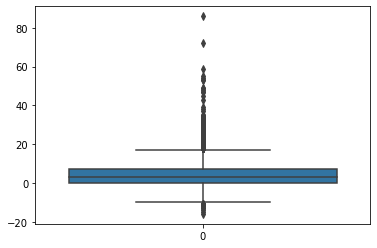

In [46]:
sns.boxplot(data = reviews_df_copy['Sentiment'])

In [47]:
reviews_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4813 entries, 0 to 4812
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lemmatized  4813 non-null   object
 1   Sentiment   4813 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.3+ KB


In [48]:
reviews_df_copy.describe()

,Sentiment
count,4813.000000
mean,4.248286
std,6.875274
min,-16.000000
25%,0.000000
50%,3.000000
75%,7.000000
max,86.000000


> **🗡🛠Note:** The Sentiment values have range from -16 (highly negative) to 86 (highly positive)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

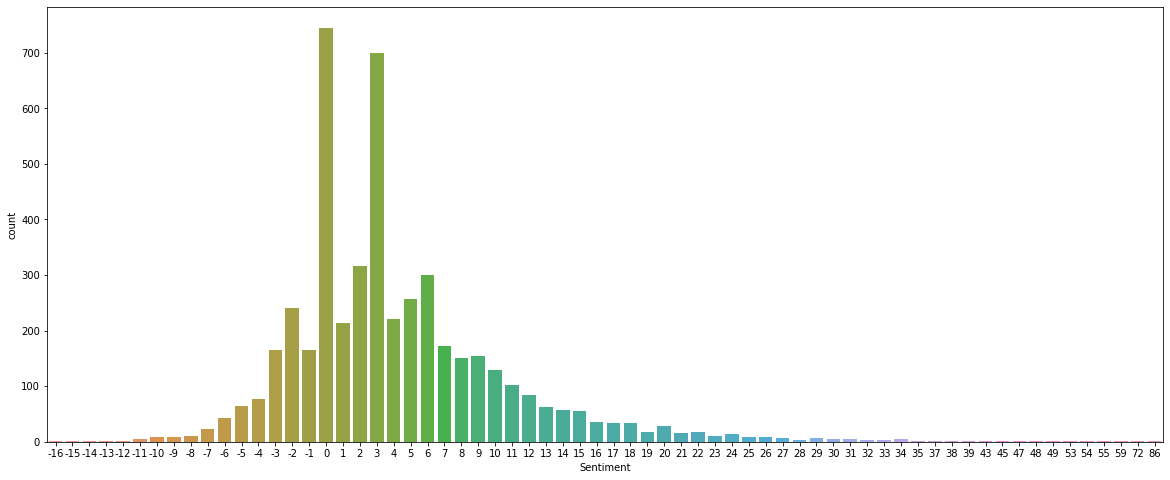

In [49]:
plt.figure(figsize= (20, 8))
sns.countplot(x = 'Sentiment', data = reviews_df_copy)

In [50]:
# Plotly plot 
# px.bar(data_frame= reviews_df_copy, x = 'Sentiment')

In [51]:
reviews_df_copy1 = reviews_df_copy.copy()

In [52]:
reviews_df_copy1['Sentiment'][1]

45

### Encoding Numbers to Labels

In [53]:
def encoding_sentiment_to_string(dataset, column_name):
    rows, colm = dataset.shape
    for i in range(rows):
        if dataset[column_name].iloc[i]>3:
            dataset[column_name].iloc[i] = 'Positive'
        elif dataset[column_name].iloc[i]<0:
            dataset[column_name].iloc[i] = 'Negative'
        else:
            dataset[column_name].iloc[i] = 'Neutral'


In [54]:
encoding_sentiment_to_string(reviews_df_copy1, 'Sentiment')

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
reviews_df_copy1

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,Neutral
1,like tell win t give technical review like ytu...,Positive
2,receive unit 4 hr ago think 1 feel sturdy prem...,Positive
3,get oneplus nord 2 5 g phone deliver yesterday...,Neutral
4,7 28 receive yesterday impression look feel gr...,Negative
...,...,...
4808,excellent mobile good camera quality battery p...,Positive
4809,need battery optimization future update overal...,Neutral
4810,good battery backup,Neutral
4811,speaker mic quantity good,Neutral


Saving DataFrame to oneplus_labeled_data.csv

In [56]:
# saving label dataframe

reviews_df_copy1.to_csv('oneplus_labeled_data.csv', index = False)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

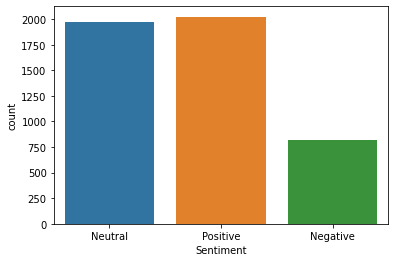

In [57]:
sns.countplot(x = 'Sentiment' ,data = reviews_df_copy1)

In [58]:
reviews_df_copy1['Sentiment'].value_counts()

Positive    2024
Neutral     1974
Negative     815
Name: Sentiment, dtype: int64

# Tokenization and Wordcloud

In [59]:
tokens = nltk.word_tokenize(all_lemi_review_string, )

In [60]:
len(tokens)

110770

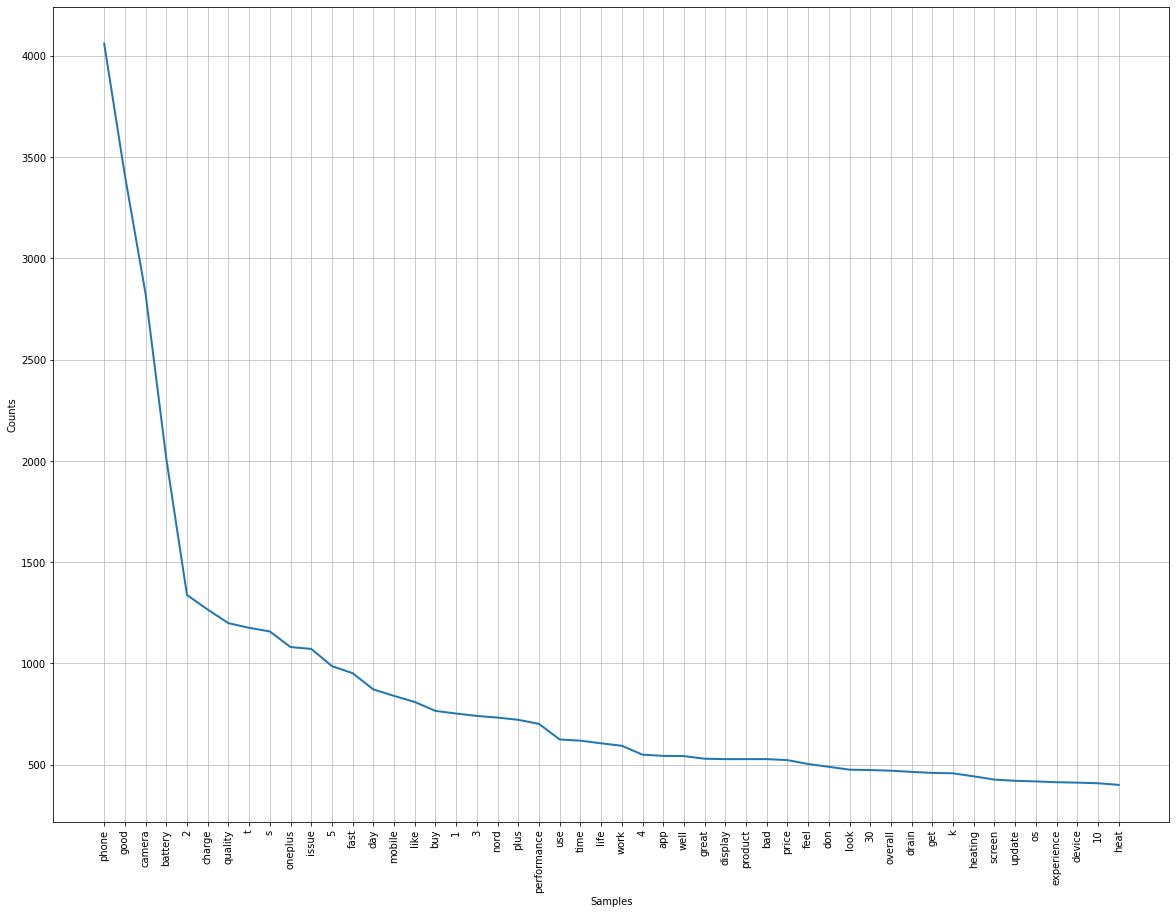

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
freq_dist =nltk.FreqDist(tokens)
plt.figure(figsize= (20,15))
freq_dist.plot(50)

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def plot_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [63]:
type(all_lemi_review_string)

str

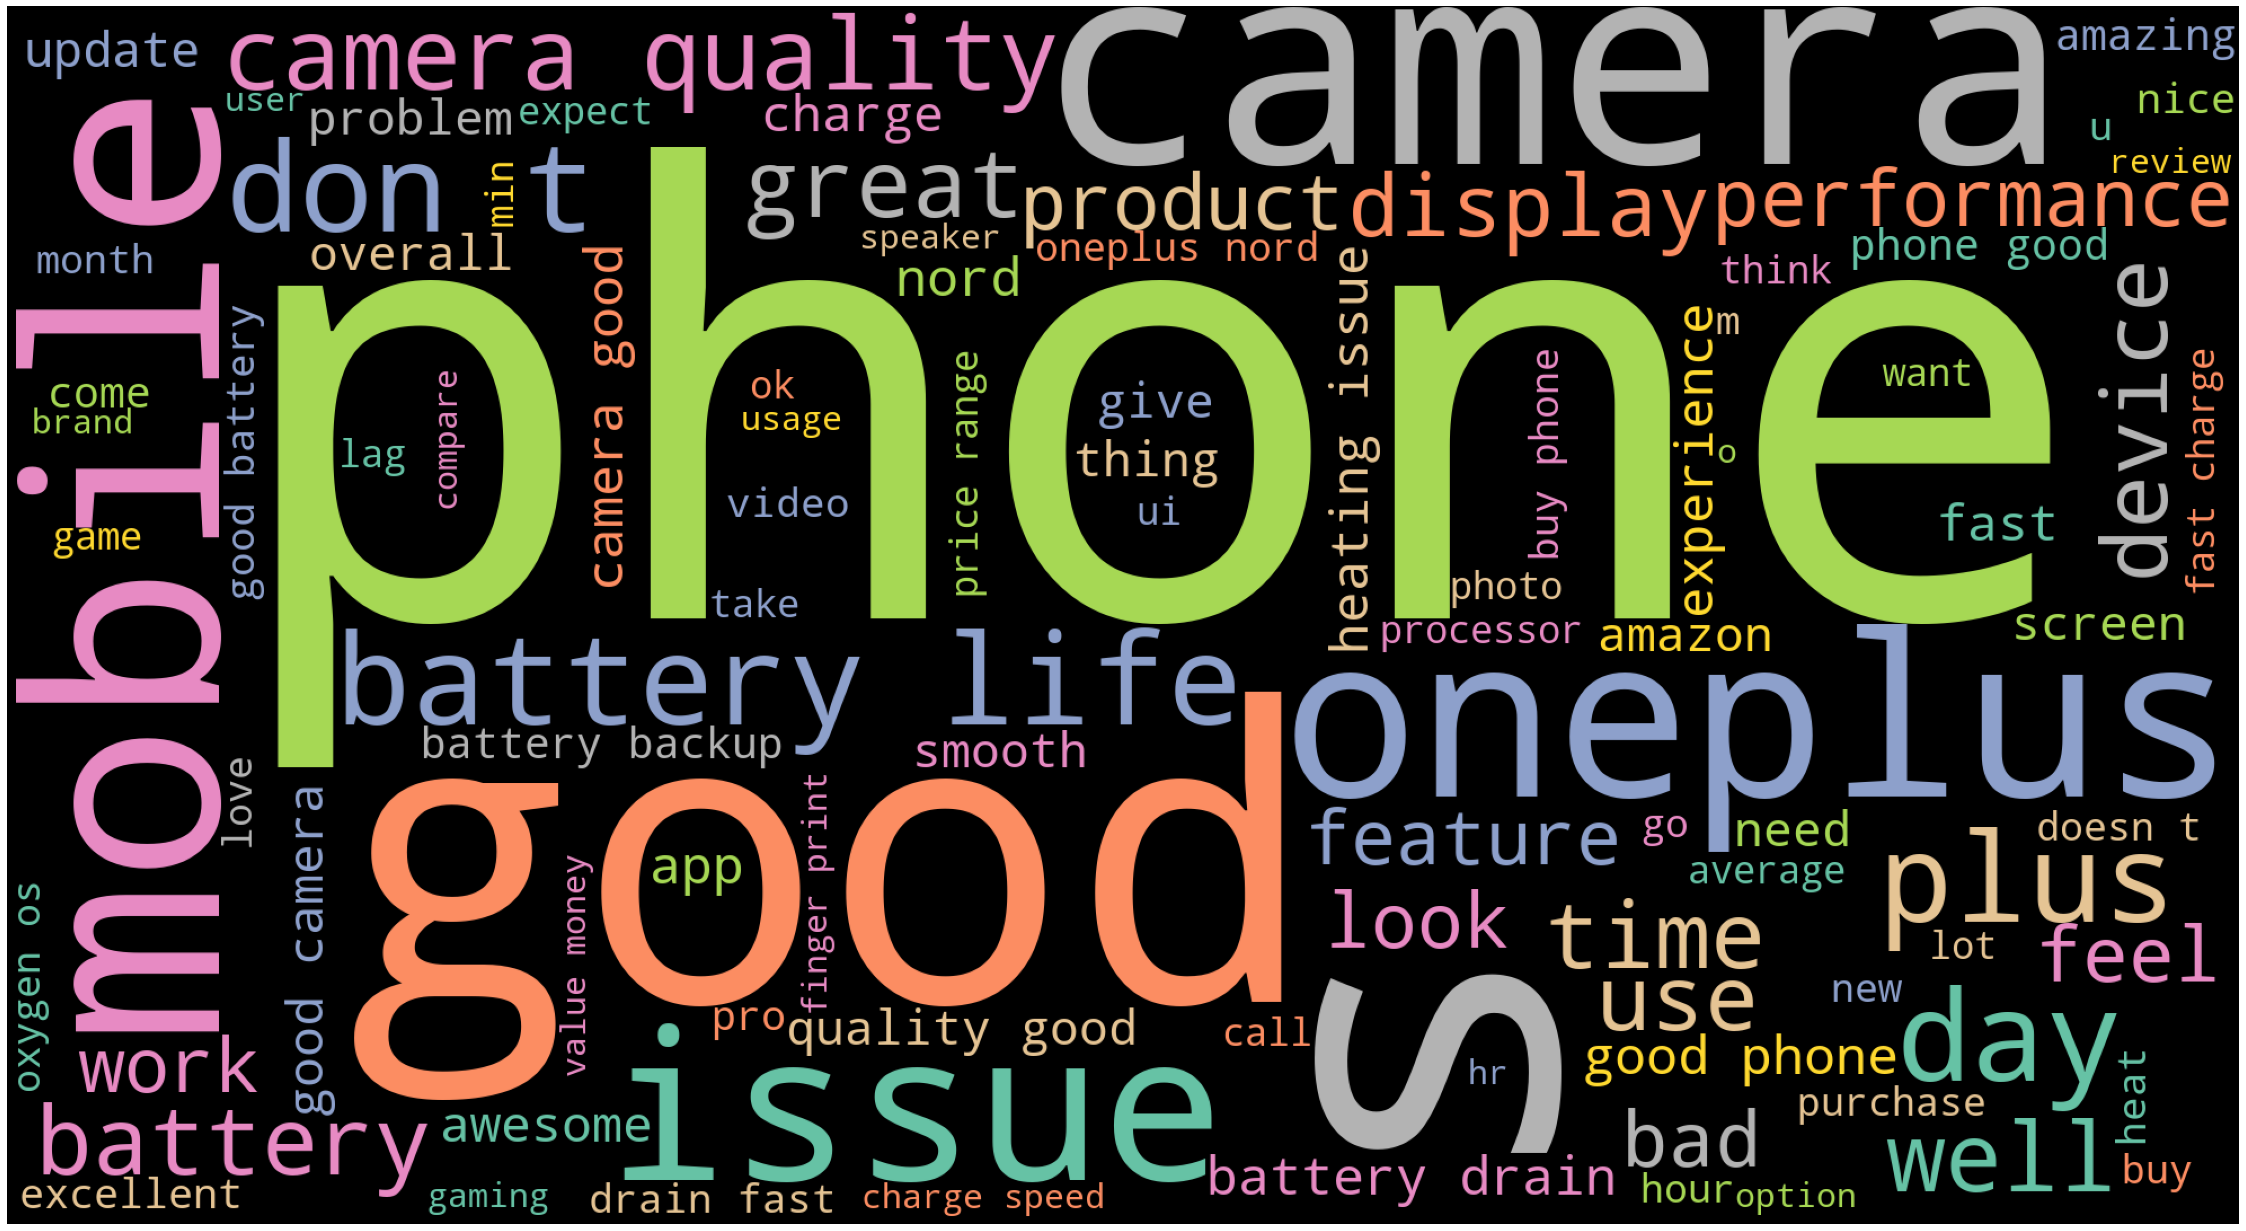

In [236]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1980, height = 1080, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(all_lemi_review_string)
# Plot
plot_cloud(wordcloud)

In [65]:
def wordcloud_function(data, title_string, big_image = True):
    wordcloud = WordCloud(width = 3000, 
    height = 2000, 
    background_color='black', 
    max_words=150,colormap='Set2',
    stopwords=stopwords, ).generate(str(data))
# Plot
    
    if big_image == True:
        plot_cloud(wordcloud)
    else:
        plt.figure(figsize= (10,10))
        plt.title(title_string)
        plt.imshow(wordcloud)

In [66]:
negative_review_data = reviews_df_copy1[reviews_df_copy1['Sentiment'] == 'Negative']
negative_review_data.head()

,lemmatized,Sentiment
4,7 28 receive yesterday impression look feel gr...,Negative
5,buy plus phone time disappointed,Negative
6,bad experience moment receive mobile hang slow...,Negative
8,ridiculous experience phone come dent didn t e...,Negative
9,bad phone heating reason not play game want re...,Negative


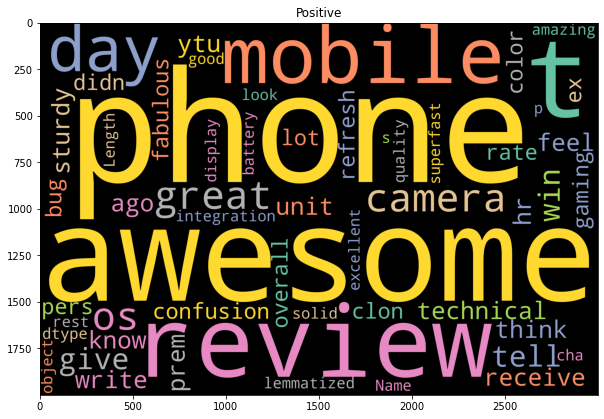

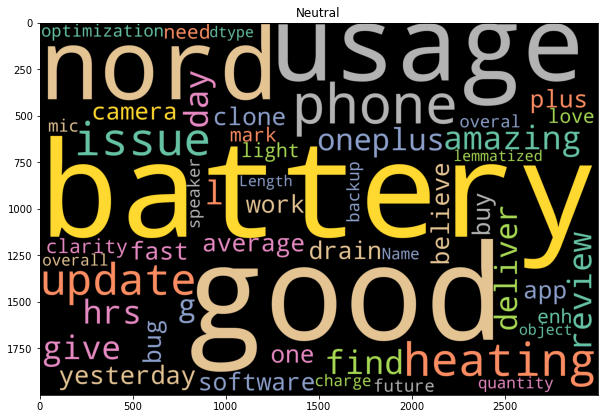

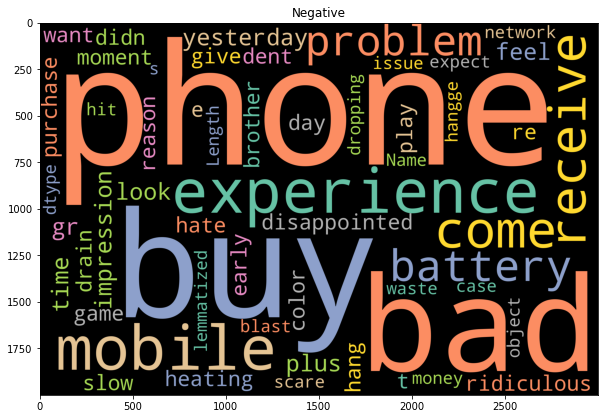

In [67]:
positive_review_dataframe = reviews_df_copy1[reviews_df_copy1['Sentiment'] == 'Positive']['lemmatized']
neutral_review_datafram = reviews_df_copy1[reviews_df_copy1['Sentiment']=='Neutral']['lemmatized']
negative_review_dataframe = reviews_df_copy1[reviews_df_copy1['Sentiment'] == 'Negative']['lemmatized']

wordcloud_function(positive_review_dataframe, 'Positive', big_image=False)
wordcloud_function(neutral_review_datafram, 'Neutral', big_image=False)
wordcloud_function(negative_review_dataframe, 'Negative', big_image= False)

# Feature extraction or Word-embedding 

Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set.

In NLP, There are two main methods for encoding text to numerical data
1. Bag of Words methods. 
2. Word2Vec methods

Bag of word contains various methods that reply on word counts in corpus, where Word2Vec train model predict word and in that process the words get transformed into vectors

Bag of word contains:
1. OneHot vectors
2. Count vectorizer.
3. Co-occurance matrix.
4. TF-IDF 

Word2Vec contains:
1. CBOW
2. Skipgram

> **🛠🗡Note:-** Here this methods are applied only for EDA purpose not for model building

## CountVectorizer

### 1 gram model

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data = cv.fit_transform(reviews_df_copy1['lemmatized'])


In [69]:
freq_df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())

In [70]:
freq_df.head()

,00,000,007,01,02,03,07,08,09,10,...,zaruri,zen,zenfone,zero,zone,zoom,zooming,zoomno,zphone,zzzz
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
a=data.toarray()

In [72]:
a.sum(axis = 0).shape

(7223,)

In [73]:
cv.get_feature_names_out().shape

(7223,)

In [74]:
def frequency_dict_functn(transformet_data, count_vector_model):
    x = transformet_data.toarray().sum(axis = 0)
    y = count_vector_model.get_feature_names_out()
    frequency_dict = dict(zip(y,x))
    return frequency_dict

In [75]:
T = frequency_dict_functn(data, cv)

In [76]:
frequency_df = pd.DataFrame(T.values(), index= T.keys(), columns= ['counts'])

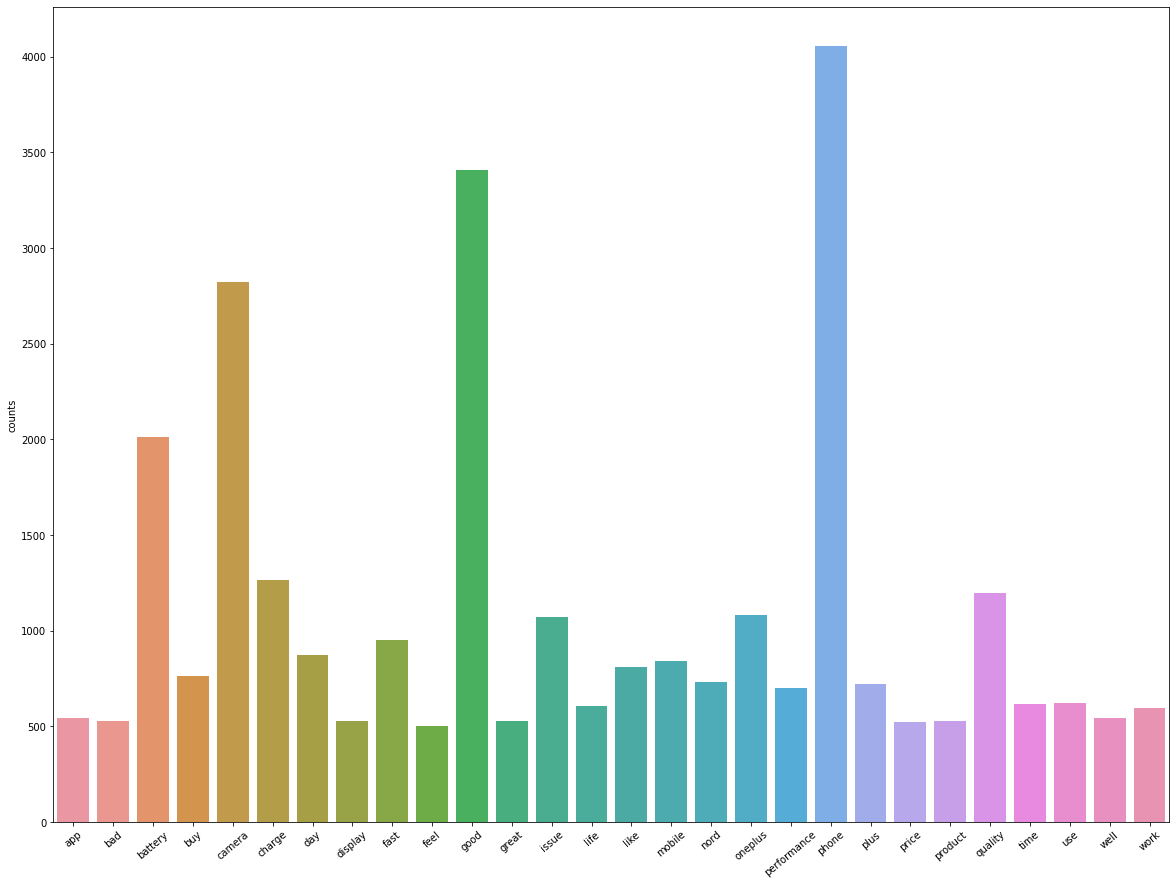

In [77]:
counts_200 = frequency_df[frequency_df['counts'] >500]
plt.figure(figsize= (20,15))
sns.barplot(x = counts_200.index, y = counts_200['counts']) 
plt.xticks(rotation = (40))
plt.show()

In [78]:
def n_gram_countplot(dataframe, count_limit, title_str, range_tuple = (1,1), figsize= (20,15), rotation_amt = 40):
    cv = CountVectorizer(ngram_range= range_tuple)
    data = cv.fit_transform(dataframe)
    dict_count = frequency_dict_functn(data, cv)
    frequency_df = pd.DataFrame(dict_count.values(), index= dict_count.keys(), columns= ['counts'])
    counts_ = frequency_df[frequency_df['counts'] >count_limit]
    plt.figure(figsize= figsize)
    sns.set_style(style = 'dark')
    sns.barplot(x = counts_.index, y = counts_['counts'], palette= sns.cubehelix_palette())
    plt.title(title_str, fontsize = 16)
    plt.xticks(rotation = (rotation_amt), fontsize = 14)
    plt.show()

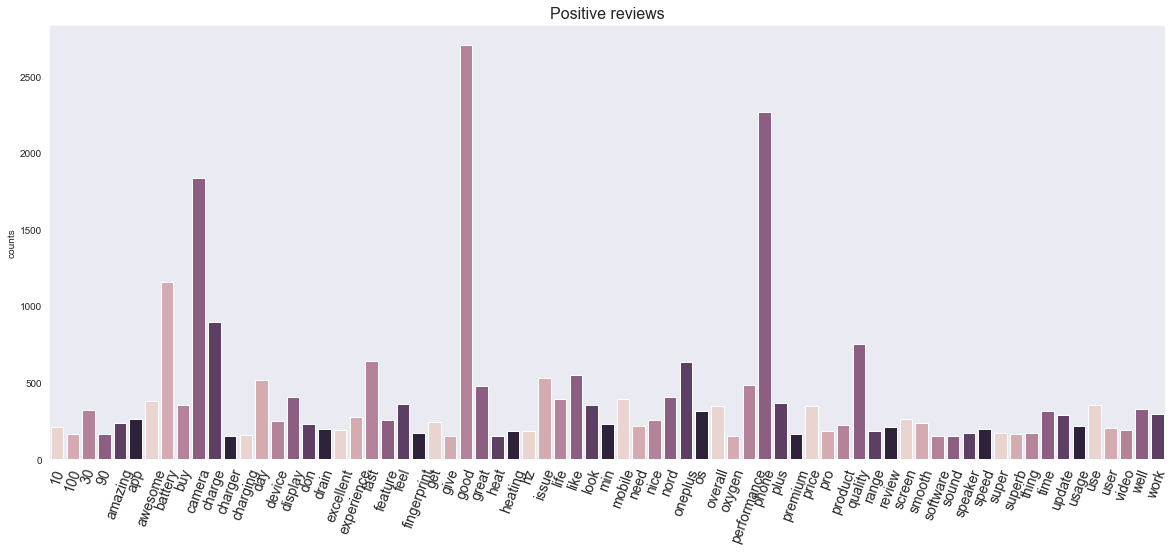

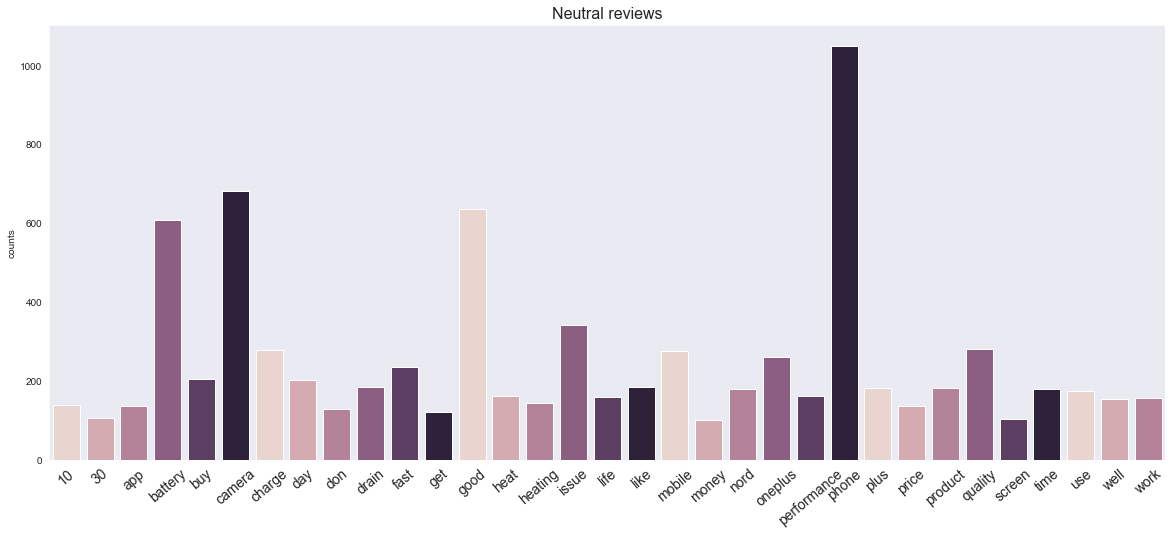

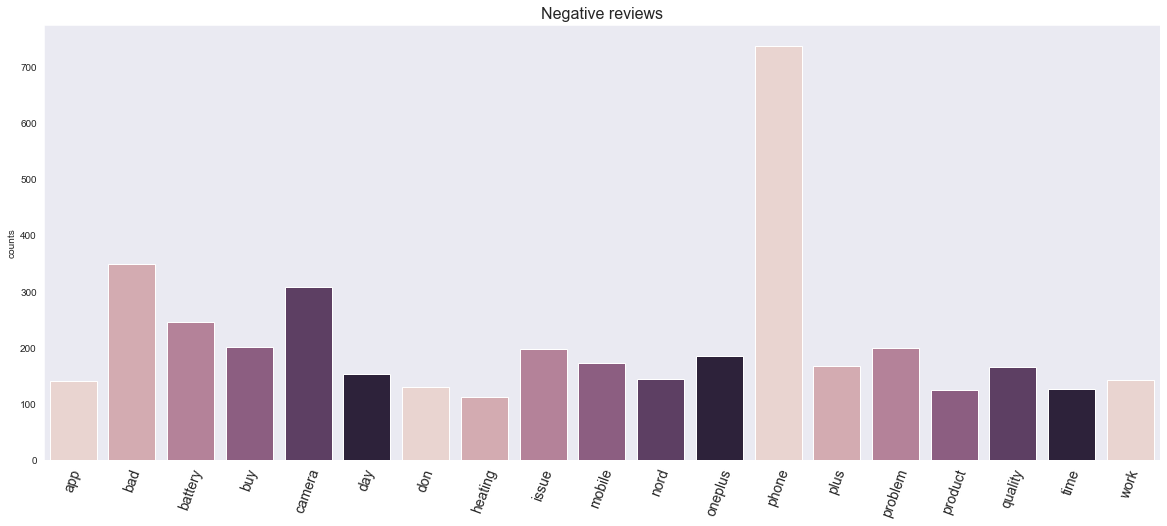

In [79]:
n_gram_countplot(positive_review_dataframe, 150, 'Positive reviews', range_tuple= (1,1), figsize= (20,8), 
                    rotation_amt= 70)
n_gram_countplot(neutral_review_datafram, 100, 'Neutral reviews', range_tuple= (1,1), figsize= (20,8))
n_gram_countplot(negative_review_dataframe, 100, 'Negative reviews',
         range_tuple= (1,1), figsize= (20,8), rotation_amt= 70)

### Bi-gram model (2)

In [80]:
positive_review_dataframe

1       like tell win t give technical review like ytu...
2       receive unit 4 hr ago think 1 feel sturdy prem...
12      write review mobile 14 day know confusion pers...
13      phone overall great os lot bug like 1 day clon...
15      refresh rate awesome camera fabulous gaming ex...
                              ...                        
4801          didn t like color os integration rest solid
4805                                        awesome phone
4806                                            s awesome
4807    phone look great amazing display superfast cha...
4808    excellent mobile good camera quality battery p...
Name: lemmatized, Length: 2024, dtype: object

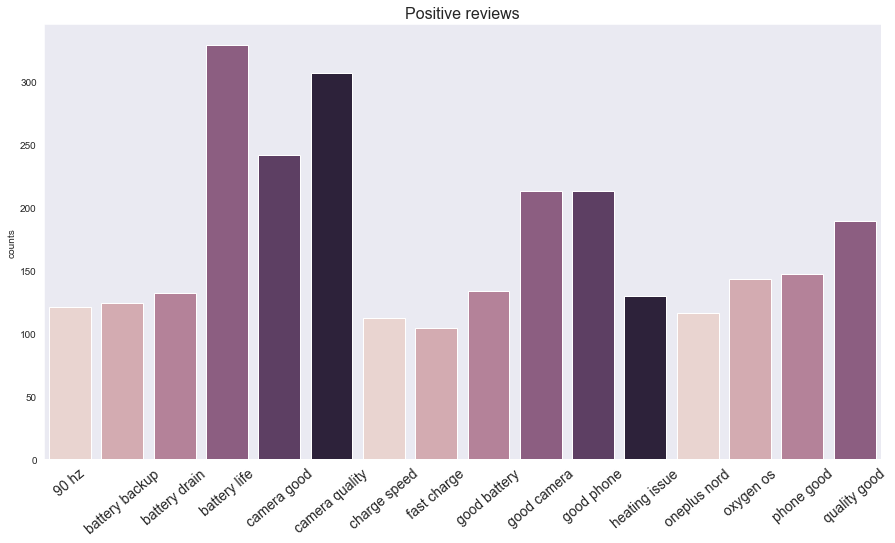

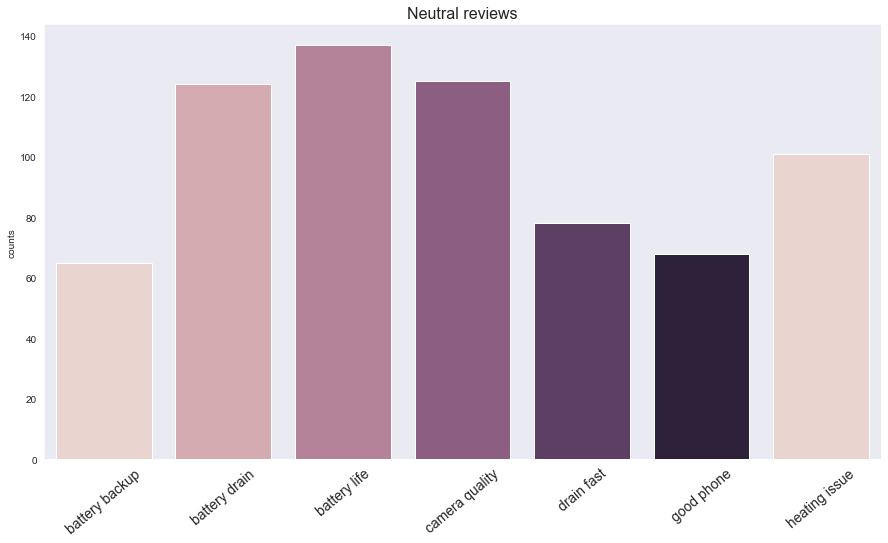

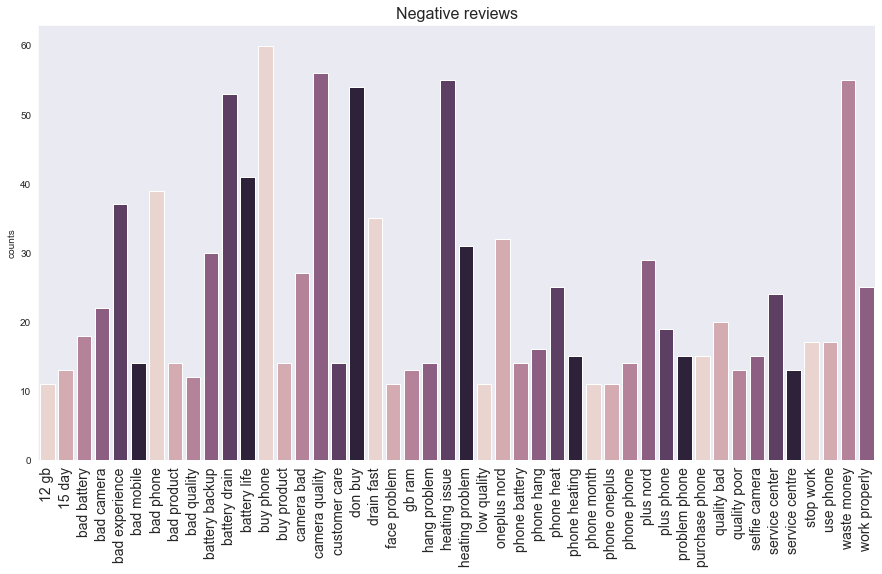

In [81]:
n_gram_countplot(positive_review_dataframe, 100, 'Positive reviews', range_tuple= (2,2), figsize= (15,8))
n_gram_countplot(neutral_review_datafram, 60, 'Neutral reviews', range_tuple= (2,2), figsize= (15,8))
n_gram_countplot(negative_review_dataframe, 10, 'Negative reviews',
         range_tuple= (2,2), figsize= (15,8), rotation_amt= 90)


### Tri-gram model

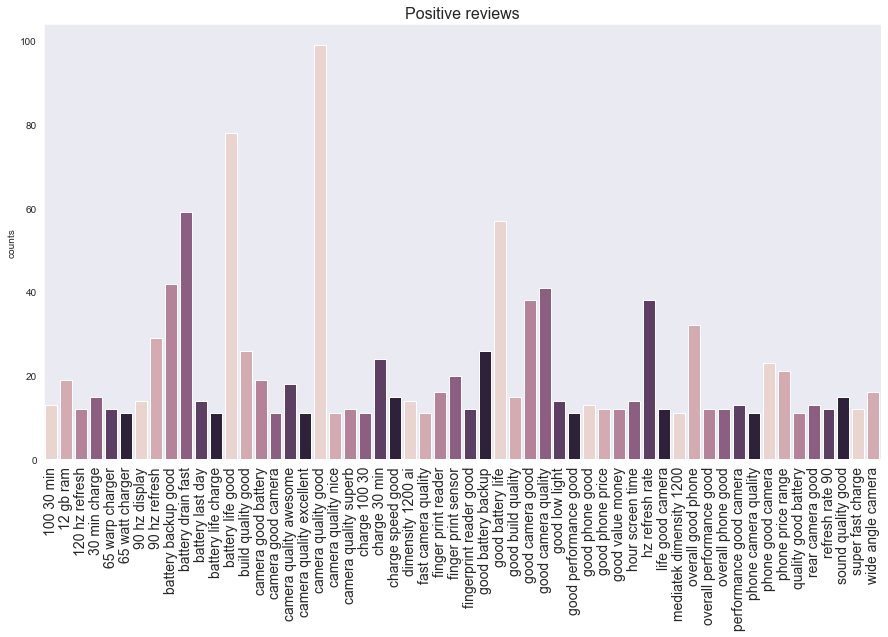

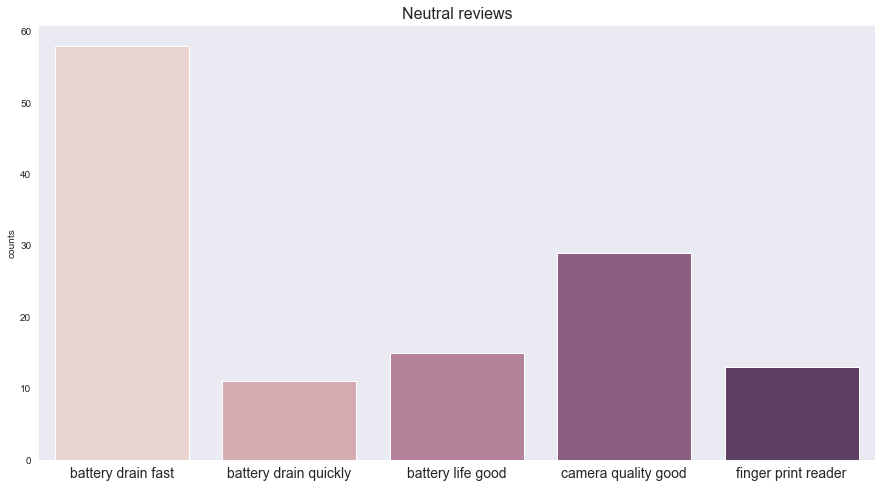

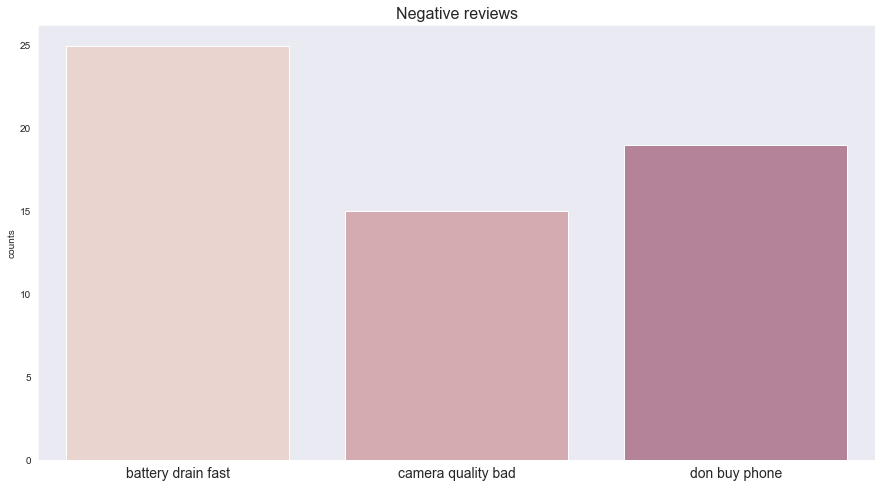

In [82]:
n_gram_countplot(positive_review_dataframe, 10, 'Positive reviews', range_tuple= (3,3),
                     figsize= (15,8), rotation_amt=90)
n_gram_countplot(neutral_review_datafram, 10, 'Neutral reviews', range_tuple= (3,3), figsize= (15,8), rotation_amt=0)
n_gram_countplot(negative_review_dataframe, 10, 'Negative reviews',
         range_tuple= (3,3), figsize= (15,8), rotation_amt=0)


### Quad-gram

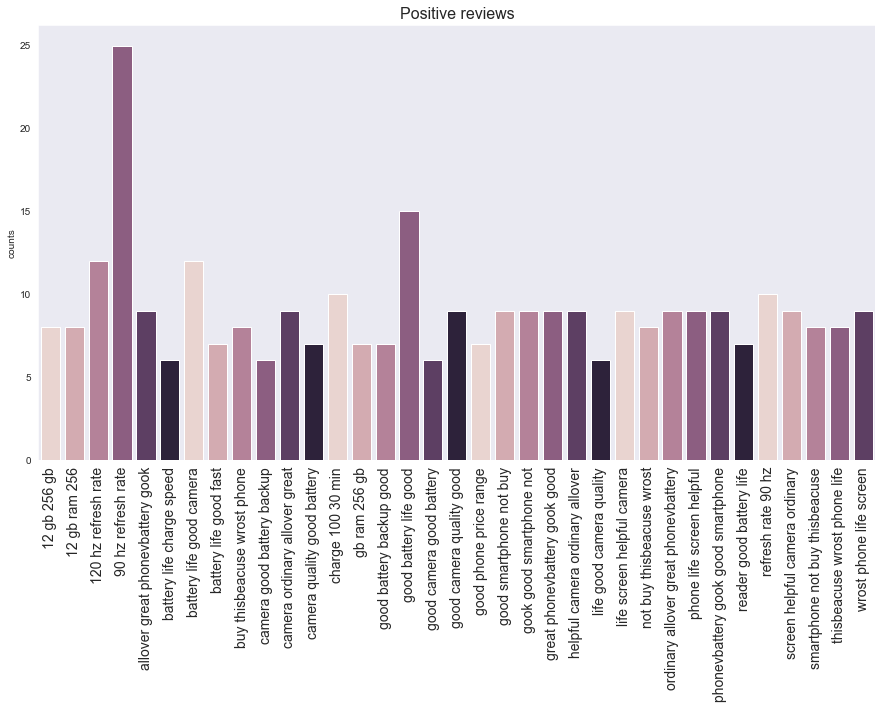

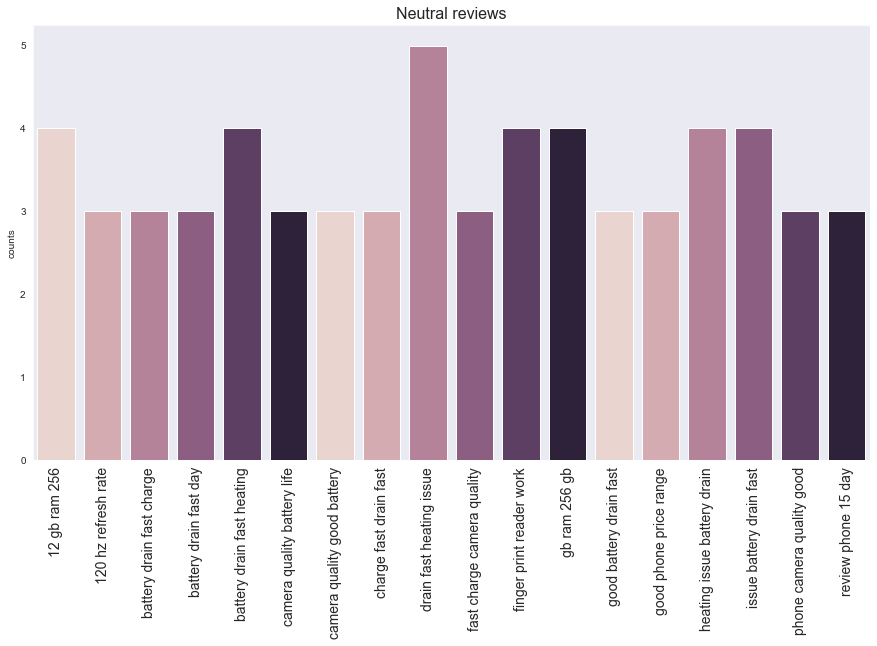

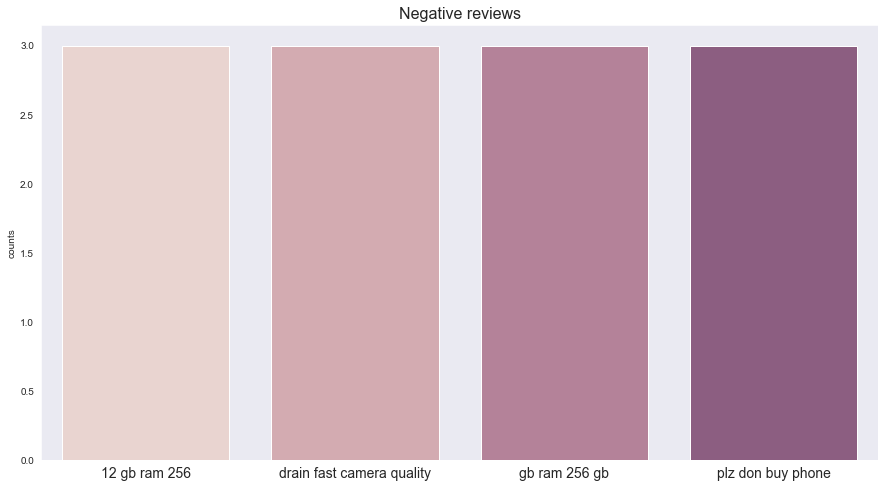

In [83]:
n_gram_countplot(positive_review_dataframe, 5, 'Positive reviews', range_tuple= (4,4),
                     figsize= (15,8), rotation_amt=90)
n_gram_countplot(neutral_review_datafram, 2, 'Neutral reviews', range_tuple= (4,4), figsize= (15,8), rotation_amt=90)
n_gram_countplot(negative_review_dataframe, 2, 'Negative reviews',
         range_tuple= (4,4), figsize= (15,8), rotation_amt=0)


### Summary about N-gram CountVectorizer plots

So we can see phone word is in biggest font in word cloud, because some negative or positive words coming before phone word like good phone, bad phone etc. it is clear from bi and tri gram that phone follows many different words. so rather than going with one-gram, we are going for bi and tri gram models and then we select the best one. 

**Now EDA and data cleaning is over we are going for model building and feature selection in another jupyter file named as ***Sentiment_analysis_model.ipynb*****

🎉🎉🎉🎊

## Not related to EDA

In [84]:
# cleaned_list and cleaned_df
list_of_lemma = cleaned_list_df

In [85]:
lst_tokens = []
for list in list_of_lemma:
    lst_string = ['<START>']+list.split(sep= ' ')+['<END>']
    lst_tokens.append(lst_string)
    

In [86]:
print(lst_tokens[:1])

[['<START>', 'in', 'my', 'first', 'review', 'given', 'within', '24', 'hrs', 'l', 'found', 'it', 'amazing', 'but', 'after', '10', 'days', 'of', 'usage', 'l', 'can', 'say', 'it', 'is', 'full', 'of', 'bugs', 'l', 'checked', 'my', 'return', 'window', 'it', 'passed', 'on', '3', 'rd', 'aug', 'l', 'regret', 'to', 'choose', 'one', 'plus', 'over', 'samsung', 'sooner', 'l', 'have', 'to', 'exchange', 'or', 'throw', 'this', 'mobile', 'if', 'bugs', 'not', 'fixed', 'one', 'plus', 'no', 'never', 'purchase', 'frustrated', 'with', 'this', 'mobile', '', '<END>']]


In [87]:
def distinct_word(corpus):
    """
    Determine a list of distinct words for corpus
    params: 
        Corpus (list of list of strings)
    Return:
        Corpus_word (list of unique strings)
        Num_corpus_words
    """
    
    corpus_word = []
    for list_ in lst_tokens:
        for word in list_:
            if word == None:
                pass
            else:
                corpus_word.append(word)

    corpus_word = set(corpus_word)
    corpus_word_list =[]
    for word in corpus_word:
        corpus_word_list.append(word)


    corpus_word_list.sort()
    num_corpus_words = len(corpus_word_list)
    return corpus_word_list, num_corpus_words

In [88]:
unique_words, no_of_words = distinct_word(lst_tokens)

In [89]:
len(unique_words)

8799

In [90]:
unique_words[8797]

'zphone'

In [91]:
word_dict = dict(zip(unique_words, range(len(unique_words))))

In [92]:
import pickle
file = open('word_dict.pkl', 'wb')
pickle.dump(word_dict, file)

In [93]:
file = open('unique_word_list.pkl', 'wb')
pickle.dump(unique_words, file)

In [94]:
file = open('list_of_list_tokens.pkl', 'wb')
pickle.dump(lst_tokens, file)

In [95]:
file = open('word_dict.pkl', 'rb')
a=pickle.load(file)

In [96]:
a

{'': 0,
 '0': 1,
 '00': 2,
 '000': 3,
 '007': 4,
 '01': 5,
 '02': 6,
 '03': 7,
 '07': 8,
 '08': 9,
 '09': 10,
 '1': 11,
 '10': 12,
 '100': 13,
 '1000': 14,
 '10000': 15,
 '1002': 16,
 '102': 17,
 '107': 18,
 '1080': 19,
 '11': 20,
 '110': 21,
 '12': 22,
 '120': 23,
 '1200': 24,
 '12000': 25,
 '128': 26,
 '13': 27,
 '1300': 28,
 '14': 29,
 '14000': 30,
 '144': 31,
 '1499': 32,
 '15': 33,
 '15000': 34,
 '15500': 35,
 '16': 36,
 '17': 37,
 '17000': 38,
 '175': 39,
 '1750': 40,
 '18': 41,
 '180': 42,
 '1800': 43,
 '18000': 44,
 '189': 45,
 '19': 46,
 '2': 47,
 '20': 48,
 '200': 49,
 '2000': 50,
 '20000': 51,
 '2011': 52,
 '2014': 53,
 '2015': 54,
 '2016': 55,
 '2017': 56,
 '2018': 57,
 '2019': 58,
 '2020': 59,
 '2021': 60,
 '21': 61,
 '2160': 62,
 '21600': 63,
 '217': 64,
 '22': 65,
 '2230': 66,
 '225': 67,
 '23': 68,
 '24': 69,
 '240': 70,
 '24000': 71,
 '25': 72,
 '250': 73,
 '25000': 74,
 '251': 75,
 '256': 76,
 '25749': 77,
 '26': 78,
 '27': 79,
 '27000': 80,
 '27999': 81,
 '28': 82,
 

# For balancing

The dataset is imbalance in term of negative review which are 815, where other have 2000 reviews and we have text data so we are creating duplicates for balancing the 'Negative' class (imbalanced class). Using random-oversampling.

In [97]:
import imblearn
from imblearn.over_sampling import SMOTEN, RandomOverSampler

In [221]:
reviews_oversampling = reviews_df_copy1
reviews_oversampling.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,Neutral
1,like tell win t give technical review like ytu...,Positive
2,receive unit 4 hr ago think 1 feel sturdy prem...,Positive
3,get oneplus nord 2 5 g phone deliver yesterday...,Neutral
4,7 28 receive yesterday impression look feel gr...,Negative


In [222]:
# Counting the no of reviews
reviews_oversampling['Sentiment'].value_counts()

Positive    2024
Neutral     1974
Negative     815
Name: Sentiment, dtype: int64

Select the negative reviews and store them into separete dataframe

In [223]:
negatives = reviews_oversampling[reviews_oversampling['Sentiment'] == 'Negative'].reset_index()
negatives.drop('index', axis = 1, inplace= True)

In [224]:
negatives.iloc[4,:]

lemmatized    bad phone heating reason not play game want re...
Sentiment                                              Negative
Name: 4, dtype: object

In [225]:
# Creating random number list, so we can choose the rows at random
np.random.seed(20)
list_random =np.random.randint(0, 815, size = (800)).tolist()

In [226]:
# Now here we are selecting negative review using random numbers that we have created and storing into dataframe
# So we can merge previous and this dataframe
negative_random = negatives.iloc[list_random, :]

In [227]:
# Appending the dataframe
reviews_oversampling = reviews_oversampling.append(negative_random)
reviews_oversampling.reset_index()

,index,lemmatized,Sentiment
0,0,review give 24 hrs l find amazing 10 day usage...,Neutral
1,1,like tell win t give technical review like ytu...,Positive
2,2,receive unit 4 hr ago think 1 feel sturdy prem...,Positive
3,3,get oneplus nord 2 5 g phone deliver yesterday...,Neutral
4,4,7 28 receive yesterday impression look feel gr...,Negative
...,...,...,...
5608,719,camera bad,Negative
5609,477,camera stop work month fast charging isn t wor...,Negative
5610,49,set clone app whatsapp doneclone whatsapp pr k...,Negative
5611,541,phone lag 22 storage,Negative


In [229]:
reviews_oversampling = reviews_oversampling.reset_index()
reviews_oversampling = reviews_oversampling.drop('index', axis = 1)
reviews_oversampling.tail()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,Neutral
1,like tell win t give technical review like ytu...,Positive
2,receive unit 4 hr ago think 1 feel sturdy prem...,Positive
3,get oneplus nord 2 5 g phone deliver yesterday...,Neutral
4,7 28 receive yesterday impression look feel gr...,Negative
...,...,...
5608,camera bad,Negative
5609,camera stop work month fast charging isn t wor...,Negative
5610,set clone app whatsapp doneclone whatsapp pr k...,Negative
5611,phone lag 22 storage,Negative


Counting the classes in New dataframe

In [230]:
reviews_oversampling['Sentiment'].value_counts()

Positive    2024
Neutral     1974
Negative    1615
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

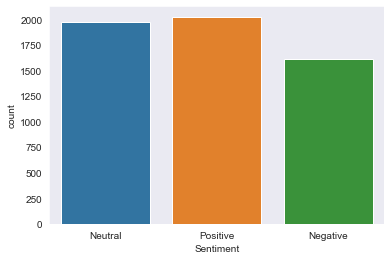

In [231]:
sns.countplot(x=reviews_oversampling['Sentiment'])

Counting duplicates in the dataframe, so as you can see there are 800 duplicates created for balancing, 
but still there are 100 duplicates in Positive class

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

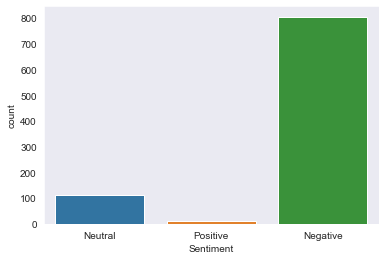

In [232]:
d = reviews_oversampling.duplicated()
sns.countplot(x=reviews_oversampling.Sentiment[d])

### Oversampling Dataframe

In [233]:
reviews_oversampling

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,Neutral
1,like tell win t give technical review like ytu...,Positive
2,receive unit 4 hr ago think 1 feel sturdy prem...,Positive
3,get oneplus nord 2 5 g phone deliver yesterday...,Neutral
4,7 28 receive yesterday impression look feel gr...,Negative
...,...,...
5608,camera bad,Negative
5609,camera stop work month fast charging isn t wor...,Negative
5610,set clone app whatsapp doneclone whatsapp pr k...,Negative
5611,phone lag 22 storage,Negative


In [235]:
reviews_oversampling.to_csv('oneplus_labeled_data_oversampled.csv', index = False)